**you can download the data from this [link](https://www.kaggle.com/gpreda/covid19-tweets)**

# **Machine Learning Sentiment Analysis of Text Data Capstone Project**

###Describtion



This project addresses the problem of analyzing feelings on Twitter. The goal of this project was to predict the emotions of this specific Twitter dataset using Python. Sentiment analysis can predict many different emotions associated with the text, but in this report only 3 disciplines were considered: positive, negative and neutral. The training data set was large and the data in it were very good, which greatly affected the ease of building a good classifier. After creating a lot of custom features, using word bag representations and applying some classification algorithms, the classification accuracy was achieved at the level of 89%. Analyzing general sentiments as companies try to know the response of their products to the market, predict political elections and forecast social and economic phenomena such as stock market.



Sentiment analysis is a wonderful field in data science. There are several steps that must be taken to analyze sentiment in tweets. First, you must have data about the tweets that you should work on, and it is preferable to have big data because the bigger the better the analysis. You display the data, read it and understand its characteristics, and begin to understand the relationships between the columns. Then we start by cleaning the data from punctuation marks, links and special symbols, and many other things that are not necessary for us in the analysis and will consume from RAM only. After we clean the data, we start building models based on clean data, and there are several Classifiers can be used such as Logistec Regression, Stochastic Gradient Decent	, Naive Bayers and XGboost, then compare the result for each Classifier you used and take the Classifier which has the highest accuracy.

## **Introduction**

One of the most important things to learn in the field of data science is sentiment analysis, and there are several sources from which we can bring data for analysis. One of these sources is the tweets that we can take from the Twitter site. Big data that we can use greatly to predict the condition of people and what they feel through their post, and determine whether the person’s feelings are negative, positive or neutral. In this notebook, I will analyze these tweets to predict the percentage of people with negative, positive and neutral emotions.

So before we start everything let's call up the most important libraries that we will use

in python, when you want to download any library , use !pip install and then the name for the library that you want.
i want to download the library emoji because it will help me on this sentiment analysis 

In [1]:
!pip install emoji

In [2]:
import numpy as np # comprehensive mathematical functions, random number generators, linear algebra routines
import pandas as pd #fast, powerful, flexible and easy to use open source data analysis 
import os #Executing a shell command 
import seaborn as sns #high-level interface for drawing attractive and informative statistical graphics
import re #lexible and concise means to match strings of text
import matplotlib.pyplot as plt #big data numerical handling resource.
import nltk #Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP)
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string
import emoji
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud,STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Here we will read the data called Covid 19 Tweets

---



In [3]:
df = pd.read_csv('covid19_tweets (1).csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


Let's show some information and description about this data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [5]:
df.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


Here, we will display the nan ratio in each column and represent it on a heat map

In [6]:
df.isnull().sum()/len(df)

user_name           0.000000
user_location       0.205301
user_description    0.057429
user_created        0.000000
user_followers      0.000000
user_friends        0.000000
user_favourites     0.000000
user_verified       0.000000
date                0.000000
text                0.000000
hashtags            0.286609
source              0.000430
is_retweet          0.000000
dtype: float64

 lit's describe the nullvalues using heatmap to show the missing value for each column

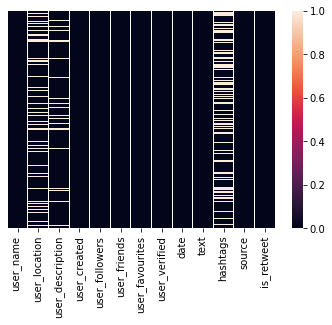

In [7]:
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)

as youcan see here m the missing value is logical ,because not every one post in twitter and write hashtag, and there is no location for each text , of cours there will be to many tweets that is from the same location , and not the all users write a discribtion for them selfs

In [8]:
df.nunique()

user_name            92276
user_location        26920
user_description     89200
user_created         93708
user_followers       27694
user_friends         11022
user_favourites      35259
user_verified            2
date                136611
text                178683
hashtags             52640
source                 610
is_retweet               1
dtype: int64

Here we will show the percentage of unique values for each column and represent it by subplot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


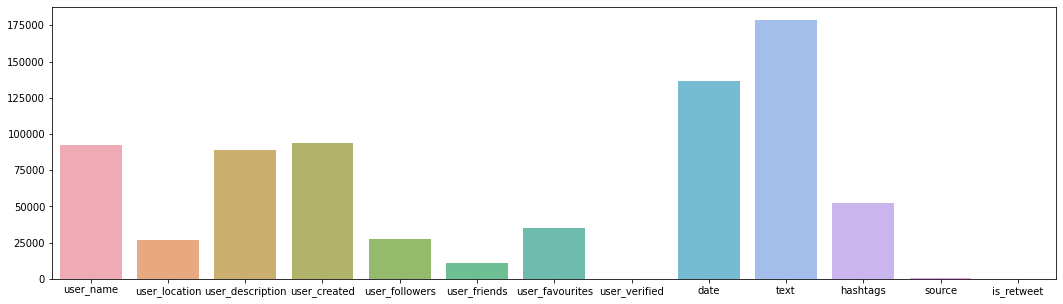

In [9]:
f, ax = plt.subplots(1,1, figsize=(18,5))
sns.barplot(df.columns, y=df.nunique(), alpha=0.8)

Also, in this plot, we find that the texts are completely different from each other, and to analyze them, we find that almost every user tweeted twice based on the username

## **Data Cleaning**

Data cleaning is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data preprocessing is a proven method of resolving such issues. Data preprocessing prepares raw data for further processing. The aim of the following preprocessing is to create a Bag-of-Words representation of the data. The steps will execute as follows:

1.	Cleaning 

  a.	Remove URLs 

  b.	Remove usernames (mentions)

  c.	Remove tweets with Not Available text

  d.	Remove special characters

  e.	Remove numbers


2.	Text processing

  a.	Tokenize

  b.	Steaming
  
3.	Build a word list of bag words


after display our dat , we see that there is to many columns that dont have correlation between each other.
so , Here we will take the text column in the data, because we will clean and work on it.

Before I took the text and started working with it, I took it and tried to do some preprocessing on it through the Orange program.
The Orange program is a program that helps us to analyze tweets and tweets, and also helps us to clean them up and saves us time.
After I worked on it, I did not find it very suitable for work, although the results of the analysis were very close to the analysis without it, but it increased the load on the device and slower the analysis process

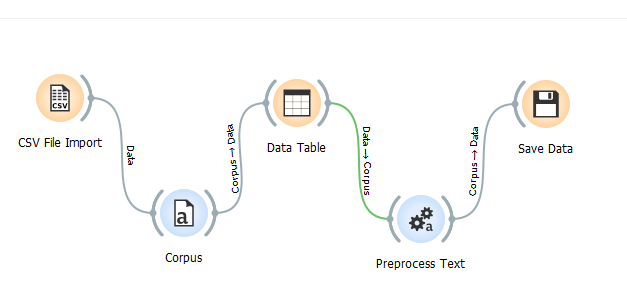

So I took the text directly from the data and started working on it

In [10]:
tweets=pd.DataFrame(df['text'])
tweets.head()

,text
0,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,@brookbanktv The one gift #COVID19 has give me...
4,25 July : Media Bulletin on Novel #CoronaVirus...


### Here we will add two columns, the first column is the text after cleaning, and the second column is to make sure that there are no emojis

In [11]:
def nlp(df):
    df['token'] = df['text'].apply(lambda x: x.lower()) 
    df['token'] = df['token'].apply(lambda x: x.replace('\n', ' '))
    df['token'] = df['token'].str.replace('http\S+|www.\S+', '', case=False)
    df['token'] = df['token'].apply(lambda x: x.replace('&gt;', ''))
    df['emoji'] = df['token'].apply(lambda x: text_has_emoji(x))
    df['token'] = df['token'].apply(lambda x: str(x).replace(" s ", " "))
    return df

we will be start with the regular expressions, this function will determine if there is an emoji or not, if there is an emoji in the text to delete it.

The emoji library is a library from Python that helps us determine if there are emojis in the text that we want to work on or not, and it helps us and gives us options to delete the symbol and others

In [12]:
import re
def char_is_emoji(character):
    return character in emoji.UNICODE_EMOJI
#does the text contain an emoji?
def text_has_emoji(text):
    for character in text:
        if character in emoji.UNICODE_EMOJI:
            return True
    return False
#remove the emoji
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

This function will determine whether or not there are punctuation marks, and if any, we will delete them

In [13]:
punct =[]
punct += list(string.punctuation)
punct += '’'
punct.remove("'")
def remove_punctuations(text):
    for punctuation in punct:
        text = text.replace(punctuation, ' ')
    return text

This function will determine if there are any white spaces, hyperlinks, and remove the "s" that were created after removing the punctuation. We will also check again if there is an emoji or not, and we will also lowercase the letters.

Well, let's apply the function and print in a new variable called Tweets 1

In [14]:
tweets1=(nlp(tweets))

In [15]:
(tweets1)

,text,token,emoji
0,If I smelled the scent of hand sanitizers toda...,if i smelled the scent of hand sanitizers toda...,False
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,hey @yankees @yankeespr and @mlb - wouldn't it...,False
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,@diane3443 @wdunlap @realdonaldtrump trump nev...,False
3,@brookbanktv The one gift #COVID19 has give me...,@brookbanktv the one gift #covid19 has give me...,False
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 july : media bulletin on novel #coronavirus...,False
...,...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,thanks @iamohmai for nominating me for the @wh...,False
179104,2020! The year of insanity! Lol! #COVID19 http...,2020! the year of insanity! lol! #covid19,False
179105,@CTVNews A powerful painting by Juan Lucena. I...,@ctvnews a powerful painting by juan lucena. i...,False
179106,"More than 1,200 students test positive for #CO...","more than 1,200 students test positive for #co...",False


 after that , we will apply another function that will remove all URL's, usernames , special characters and numbers

In [16]:
def clean_tweets(tweet3):
    
    tweet3 = re.sub(r"http\S+", "", tweet3)
    tweet3 = re.sub(r"@[^\s]+[\s]?",'',tweet3)
    tweet3 = re.sub('[^ a-zA-Z0-9]', '', tweet3)
    tweet3 = re.sub('[0-9]', '', tweet3)
    tweet3 = "".join([i.lower() for i in tweet3 if i not in string.punctuation])
    tweet3 = re.sub(r'\b(\w+)( \1\b)+', r'\1', tweet3)
    
    return tweet3

In [17]:
tweets1['token'] = tweets1['token'].apply(clean_tweets)

## Tokenization

here we will check if there is any empty text

In [18]:
tweets1 = tweets1[tweets1['text'] != "Not Available"]

and here we will tokenized the text columns

In [19]:
tt = TweetTokenizer()
tweets1['token'].apply(tt.tokenize)

0         [if, i, smelled, the, scent, of, hand, sanitiz...
1         [hey, and, wouldnt, it, have, made, more, sens...
2         [trump, never, once, claimed, covid, was, a, h...
3         [the, one, gift, covid, has, give, me, is, an,...
4         [july, media, bulletin, on, novel, coronavirus...
                                ...                        
179103    [thanks, for, nominating, me, for, the, wearam...
179104                [the, year, of, insanity, lol, covid]
179105    [a, powerful, painting, by, juan, lucena, its,...
179106    [more, than, students, test, positive, for, co...
179107                     [i, stop, when, i, see, a, stop]
Name: token, Length: 179108, dtype: object

In [20]:
tweets1.head()

,text,token,emoji
0,If I smelled the scent of hand sanitizers toda...,if i smelled the scent of hand sanitizers toda...,False
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,hey and wouldnt it have made more sense to ha...,False
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,trump never once claimed covid was a hoax we a...,False
3,@brookbanktv The one gift #COVID19 has give me...,the one gift covid has give me is an appreciat...,False
4,25 July : Media Bulletin on Novel #CoronaVirus...,july media bulletin on novel coronavirusupda...,False


Here we will analyze the text, and find out whether the feelings are negative, positive or Neutral

In [21]:
def categoriser(diction):
    if(diction['neg']>0):
        return("Negative")
    elif(diction['pos']>0):
        return('Positive')
    else:
        return('Neutral')

Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speake.
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

Lambda functions are useful when working on a collection of elements through higher-order functions, which can take one or more functions as arguments. This function is then invoked on the collection. When combined with Pandas functions such as.map (),.apply (), or.applymap (), a Lambda function can be a powerful tool to derive new values.

here we apply the polarity_scores function and add it in to new columns called token , thenwe add new column call sentiment and apply the function categoriser om it to detirmen the text sentiment if its positive negative or neutral 

In [22]:
def SentiAnlyser(df):
    analyser= SentimentIntensityAnalyzer()
    df['sentiment']=df['token'].apply(lambda x: analyser.polarity_scores(x))
    df['sentiment']=df['sentiment'].apply(lambda x:categoriser(x))
    return df

In [23]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

here we will apply SentiAnalyzer function on the data and put it in new varible called tweets2

In [24]:
tweets2=SentiAnlyser(tweets1)

In [25]:
tweets2.head()

,text,token,emoji,sentiment
0,If I smelled the scent of hand sanitizers toda...,if i smelled the scent of hand sanitizers toda...,False,Positive
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,hey and wouldnt it have made more sense to ha...,False,Negative
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,trump never once claimed covid was a hoax we a...,False,Negative
3,@brookbanktv The one gift #COVID19 has give me...,the one gift covid has give me is an appreciat...,False,Positive
4,25 July : Media Bulletin on Novel #CoronaVirus...,july media bulletin on novel coronavirusupda...,False,Positive


As we can see here, we have a new column called sentiment, to determine if the text is negative, positive, or neuterl, or Neutral

here is some information about the new data that called tweets 2

In [26]:
tweets2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179108 entries, 0 to 179107
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       179108 non-null  object
 1   token      179108 non-null  object
 2   emoji      179108 non-null  bool  
 3   sentiment  179108 non-null  object
dtypes: bool(1), object(3)
memory usage: 5.6+ MB


Here we will draw a plot for the sentiment column, to see if the values are palanced or not , if it's not , we will apply   PCA

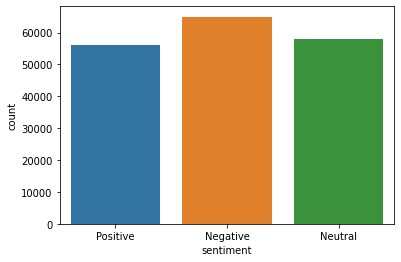

In [27]:
sns.countplot(x='sentiment',data=tweets2)

after that we will apply the function on tweets2 data

In [28]:
tweets2['text']

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol! #COVID19 http...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.

In [29]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
ps = PorterStemmer()

here is the function that we will be using it to tokenize and steem the text

In [30]:
def tokenize(text):
    return word_tokenize(text)

def stemming(words):
    stem_words = []
    for w in words:
        w = ps.stem(w)
        stem_words.append(w)
    
    return stem_words

after we apply the tokenization and stemming , we will add another column called new_tokenized that we apply the function above on it

In [31]:
tweets2['new_tokenized'] = tweets2['token'].apply(tokenize)

In [32]:
tweets2['steeming'] = tweets2['new_tokenized'].apply(stemming)

thats how the data set looking after we add the tokenization and steeming columns

In [33]:
tweets2.head()

,text,token,emoji,sentiment,new_tokenized,steeming
0,If I smelled the scent of hand sanitizers toda...,if i smelled the scent of hand sanitizers toda...,False,Positive,"[if, i, smelled, the, scent, of, hand, sanitiz...","[if, i, smell, the, scent, of, hand, sanit, to..."
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,hey and wouldnt it have made more sense to ha...,False,Negative,"[hey, and, wouldnt, it, have, made, more, sens...","[hey, and, wouldnt, it, have, made, more, sens..."
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,trump never once claimed covid was a hoax we a...,False,Negative,"[trump, never, once, claimed, covid, was, a, h...","[trump, never, onc, claim, covid, wa, a, hoax,..."
3,@brookbanktv The one gift #COVID19 has give me...,the one gift covid has give me is an appreciat...,False,Positive,"[the, one, gift, covid, has, give, me, is, an,...","[the, one, gift, covid, ha, give, me, is, an, ..."
4,25 July : Media Bulletin on Novel #CoronaVirus...,july media bulletin on novel coronavirusupda...,False,Positive,"[july, media, bulletin, on, novel, coronavirus...","[juli, media, bulletin, on, novel, coronavirus..."


In [34]:
tweets2['steeming'].head()

0    [if, i, smell, the, scent, of, hand, sanit, to...
1    [hey, and, wouldnt, it, have, made, more, sens...
2    [trump, never, onc, claim, covid, wa, a, hoax,...
3    [the, one, gift, covid, ha, give, me, is, an, ...
4    [juli, media, bulletin, on, novel, coronavirus...
Name: steeming, dtype: object

here we will count the most common words in the new tokenized column


In [35]:
from collections import Counter
words = Counter()
for idx in tweets2.index:
    words.update(tweets2.loc[idx, "new_tokenized"])

In [36]:
words.most_common(10)

[('covid', 113956),
 ('the', 105828),
 ('to', 74982),
 ('of', 59877),
 ('in', 54605),
 ('a', 47902),
 ('and', 44858),
 ('is', 34561),
 ('for', 31582),
 ('on', 23777)]

Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

In [37]:
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


here we will make a white list contain 'not & n't' ,because it's an important word in our analysis

In [38]:
whitelist = ["n't", "not"]
#whitelist = []
whitelist 

["n't", 'not']

after that we will delete all the stopwords , except the white list word 'not' and count the most comon words

In [39]:
for idx, stop_word in enumerate(stopwords):
    if stop_word not in whitelist:
        del words[stop_word]
words.most_common(10)

[('covid', 113956),
 ('cases', 18984),
 ('coronavirus', 15146),
 ('new', 15009),
 ('amp', 12286),
 ('not', 10508),
 ('people', 9277),
 ('pandemic', 8348),
 ('deaths', 7710),
 ('us', 7525)]

here we will make a wordcloud for the text , and we will display it without the words 'covid19' , 'https' and 'coronavirus' , after that we will display this wordcloud

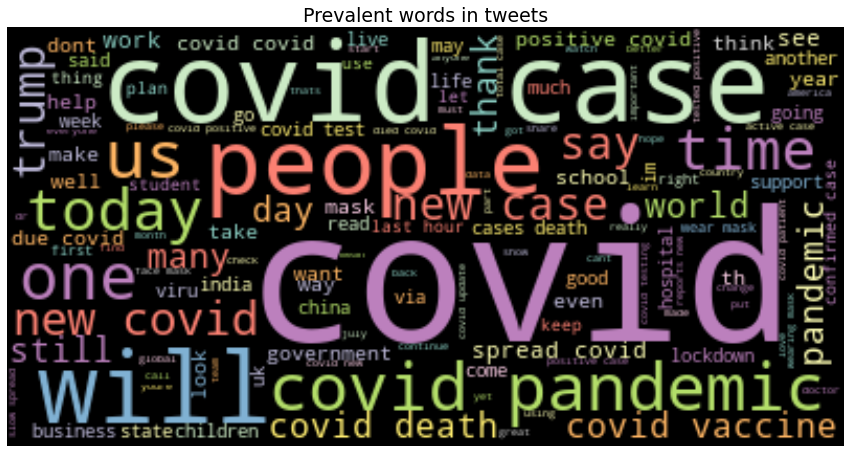

In [40]:
text = ",".join(review for review in tweets2.token if 'covid19' not in review and 'amp' not in review and 'coronavirus' not in review and 'need' not in review and 'now' not in review)
wordcloud = WordCloud(max_words=200, colormap='Set3',background_color="black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.title('Prevalent words in tweets',fontsize=19)
plt.show()

## **Classification**

and here we will apply a function that call world list , this finction use to delete the stop words  and add it to the new_tokenized column

In [41]:
def word_list(processed_data):
    min_occurrences=3 
    max_occurences=500 
    stopwords=nltk.corpus.stopwords.words("english")
    whitelist = ["n't","not"]
    wordlist = []
    
    whitelist = whitelist if whitelist is None else whitelist
    words = Counter()
    for idx in processed_data.index:
        words.update(processed_data.loc[idx, "new_tokenized"])

    for idx, stop_word in enumerate(stopwords):
        if stop_word not in whitelist:
            del words[stop_word]

the first step is to drop sentiment column because we will make a classifier based on it

In [42]:
X = tweets2.drop('sentiment', axis=1)
X.head()

,text,token,emoji,new_tokenized,steeming
0,If I smelled the scent of hand sanitizers toda...,if i smelled the scent of hand sanitizers toda...,False,"[if, i, smelled, the, scent, of, hand, sanitiz...","[if, i, smell, the, scent, of, hand, sanit, to..."
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,hey and wouldnt it have made more sense to ha...,False,"[hey, and, wouldnt, it, have, made, more, sens...","[hey, and, wouldnt, it, have, made, more, sens..."
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,trump never once claimed covid was a hoax we a...,False,"[trump, never, once, claimed, covid, was, a, h...","[trump, never, onc, claim, covid, wa, a, hoax,..."
3,@brookbanktv The one gift #COVID19 has give me...,the one gift covid has give me is an appreciat...,False,"[the, one, gift, covid, has, give, me, is, an,...","[the, one, gift, covid, ha, give, me, is, an, ..."
4,25 July : Media Bulletin on Novel #CoronaVirus...,july media bulletin on novel coronavirusupda...,False,"[july, media, bulletin, on, novel, coronavirus...","[juli, media, bulletin, on, novel, coronavirus..."


let's check the columns sentiment unique valuse to see if ther is any word than positive m negative and neutral

In [43]:
target_names = tweets2['sentiment'].unique()
target_names

array(['Positive', 'Negative', 'Neutral'], dtype=object)

here we will do a dictionary for the sentiment and give value for each one 

In [44]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'Negative': 1, 'Neutral': 2, 'Positive': 0}

In [45]:
y= tweets2['sentiment'].map(target_dict)
y.head(10)

0    0
1    1
2    1
3    0
4    0
5    1
6    2
7    2
8    0
9    0
Name: sentiment, dtype: int64

In [46]:
y.unique()

array([0, 1, 2])

here we will import the libraries that we will use to make the classifiers

In [50]:
from sklearn.model_selection import train_test_split #technique for evaluating the performance of a machine learning algorithm
from sklearn.feature_extraction.text import CountVectorizer #used to transform a given text into a vector on the basis of the frequency
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
#shows a representation of the main classification metrics on a per-class basis
# represents the model’s ability to correctly predict both the positives and negatives out of all the predictions
#table that outlines different predictions and test results and contrasts them with real-world values
from IPython.display import Markdown as md
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB #specific instance of a Naive Bayes classifier which uses a multinomial distribution for each of the features.
from sklearn.linear_model import SGDClassifier #linear classifier (by default in sklearn it is a linear SVM) that uses SGD for training (that is, looking for the minima of the loss using SGD). According to the documentation: SGDClassifier is a Linear classifiers (SVM, logistic regression, a.o.) with SGD training.
import xgboost as xgb #XGBoost applies a better regularization technique to reduce overfitting, and it is one of the differences from the gradient boosting
from sklearn.linear_model import LogisticRegression #predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

### here we will start the classification

first , we have to apply the train test split method.

stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.


In [48]:
train,valid = train_test_split(tweets2,test_size = 0.2,random_state=0,stratify = tweets2.sentiment.values)
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (143286, 6)
valid shape :  (35822, 6)


as you can see here , we will brint the shape for each the training and validation fot both X,Y

In [51]:
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.text.values)
X_valid = vectorizer.transform(valid.text.values)

y_train = train.sentiment.values
y_valid = valid.sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (143286, 257406)
X_train.shape :  (35822, 257406)
y_train.shape :  (143286,)
y_valid.shape :  (35822,)


## Naive Bayes classifier for multinomial models

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

after we apply multinomial Naive Bayes classifier , we will see the confusion matrix and the accuracy scorefor this cllassifier

In [52]:
naive_clf = MultinomialNB()

naive_clf.fit(X_train,y_train)

prediction = naive_clf.predict(X_valid)
accuracy = accuracy_score(y_valid,prediction)
print("training accuracy Score    : ",naive_clf.score(X_train,y_train))
print("Validation accuracy Score : ",accuracy )
print(classification_report(prediction,y_valid))


training accuracy Score    :  0.9014139553061709
Validation accuracy Score :  0.7536150968678466
              precision    recall  f1-score   support

    Negative       0.89      0.68      0.77     17142
     Neutral       0.64      0.89      0.74      8396
    Positive       0.71      0.77      0.74     10284

    accuracy                           0.75     35822
   macro avg       0.75      0.78      0.75     35822
weighted avg       0.78      0.75      0.76     35822



This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning, see the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.

after we apply  stochastic gradient descent (SGD) classifier , we will see the confusion matrix and the accuracy scorefor this cllassifier

In [53]:
sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.9151487235319571
Validation accuracy Score :  0.8900954720562783
              precision    recall  f1-score   support

    Negative       0.81      0.95      0.87     10983
     Neutral       0.99      0.85      0.92     13406
    Positive       0.89      0.87      0.88     11433

    accuracy                           0.89     35822
   macro avg       0.89      0.89      0.89     35822
weighted avg       0.90      0.89      0.89     35822



XGBoost stands for “Extreme Gradient Boosting”. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way. 

after we apply XGBoost classifier , we will see the confusion matrix and the accuracy scorefor this cllassifier

In [54]:
xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

Training accuracy Score    :  0.6270745222841031
Validation accuracy Score :  0.6254815476522807
              precision    recall  f1-score   support

    Negative       0.45      0.82      0.58      7091
     Neutral       0.98      0.52      0.68     22111
    Positive       0.46      0.78      0.58      6620

    accuracy                           0.63     35822
   macro avg       0.63      0.71      0.61     35822
weighted avg       0.78      0.63      0.64     35822



Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (logit regression) is estimating the parameters of a logistic model (a form of binary regression).

after we apply LogisticRegression classifier , we will see the confusion matrix and the accuracy scorefor this cllassifier

In [55]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy Score    :  0.9575743617659785
Validation accuracy Score :  0.9034113114845626
              precision    recall  f1-score   support

    Negative       0.85      0.92      0.89     11992
     Neutral       0.98      0.90      0.93     12661
    Positive       0.89      0.89      0.89     11169

    accuracy                           0.90     35822
   macro avg       0.91      0.90      0.90     35822
weighted avg       0.91      0.90      0.90     35822



In [56]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 
               'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost'],
    'Test accuracy': [ logreg_accuracy, 
               accuracy, 
              sgd_accuracy, xgb_accuracy,]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
0,Logistic Regression,0.903411
2,Stochastic Gradient Decent,0.890095
1,Naive Bayes,0.753615
3,XGBoost,0.625482


As I said earlier, when I used the data that Pre-Processes worked on through the Orange program, I found that working on the data without it would be better, and here is a comparison between the accuracy of the data between Orange and without it

**with orange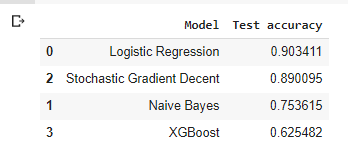**
**without orange**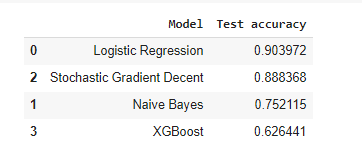

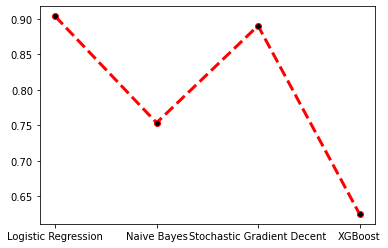

In [57]:
accuracy = models ['Test accuracy'].tolist()
model  = models ['Model'].tolist()

plt.plot( model,accuracy, label = 'Comparison between the classifier', 
      color='r', marker='o', markerfacecolor='k', 
      linestyle='--', linewidth=3)

## **Conclusion**
The increase in microblogging sites like Twitter provides an unparalleled opportunity to shape and use methods and technologies that seek and mine emotions. The work presented in this paper outlines an approach to analyzing sentiment on Twitter data. To reveal feelings, we extracted relevant data from Tweets, and added features. The overall sentiment of the tweets was then calculated using a model presented in this report. This work is exploratory in nature and the prototype that has been evaluated is a prototype. The models showed that predicting text sentiment is a non-trivial task of machine learning. A lot of pre-processing is needed just to be able to run an algorithm. The main problem with sentiment analysis is the formulation of an automated representation of a text. The simple word set was definitely not enough to get satisfactory results; thus, a lot of additional features were created based on common sense (number of symbols, exclamation marks, number of question marks, etc.). I believe a slight improvement in the classification accuracy could be developed for the given training data set, but since it included highly skewed data (a small number of negative cases), the difference is likely to be in the order of a few percentages. The thing that could boost the classification results is adding a lot of additional examples (increasing the training data set), moreover - a lot of information expressing feelings is definitely missing.
